<a href="https://colab.research.google.com/github/NafisaNeha/Algorithms/blob/main/20200204020_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
main_directory  = '/content/train-perceptron.txt'

df1 = pd.read_csv(main_directory, sep=" " , header = None)
print(df1)

   0    1  2
0  1  1.0  1
1  1 -1.0  1
2  2  2.5  2
3  0  2.0  2
4  2  3.0  2
5  4  5.0  1


## <font color = 'black'>**Part 1**</font>
---


### Training and Testing Data
---
Retriving training and testing data and dividing them into features and labels

In [ ]:
train_X = df1.iloc[:, 0:2]
train_Y = df1.iloc[:, 2]
train_X = np.array(train_X)
train_Y = np.array(train_Y)

# To check if data is successfully retrieved
print(train_X)
print(train_Y)

[[ 1.   1. ]
 [ 1.  -1. ]
 [ 2.   2.5]
 [ 0.   2. ]
 [ 2.   3. ]
 [ 4.   5. ]]
[1 1 2 2 2 1]


### Splitting Training Data
---
Splitting training data into classes according to labels

In [ ]:
class1_X1, class1_X2, class2_X1, class2_X2 = [], [], [], []

for i in range(train_X.shape[0]):
  if train_Y[i] == 1:
    class1_X1.append(train_X[i, 0])
    class1_X2.append(train_X[i, 1])
  else:
    class2_X1.append(train_X[i, 0])
    class2_X2.append(train_X[i, 1])

# To check if data is successfully retrieved
print(class1_X1)
print(class1_X2)
print(class2_X1)
print(class2_X2)

[1.0, 1.0, 4.0]
[1.0, -1.0, 5.0]
[2.0, 0.0, 2.0]
[2.5, 2.0, 3.0]


### Plotting Training Data
---
Plotting the training data. There are two classes and they are shown.

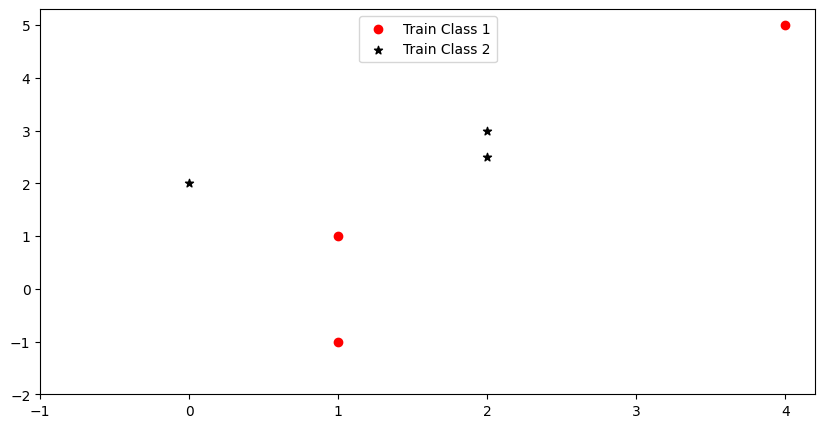

In [ ]:
limit_X1 = list(map(int, class1_X1 + class2_X1))
limit_X2 = list(map(int, class1_X2 + class2_X2))

plt.figure(figsize = (10, 5))
# Training Data
plt.scatter(class1_X1, class1_X2, label = 'Train Class 1', color = 'red', marker = 'o')
plt.scatter(class2_X1, class2_X2, label = 'Train Class 2', color = 'black', marker = '*')
# Plot Accessory
plt.xticks([i for i in range(min(limit_X1) - 1, max(limit_X1) + 1)])
plt.yticks([i for i in range(min(limit_X2) - 1, max(limit_X2) + 1)])
plt.legend(loc = 'upper center')
plt.show()

## <font color = 'black'>**Part 2**</font>
---

### Dimension Increase
---
Higher dimensional sample points are constructed using given matrix represented as,

\begin{equation*}
y =
\begin{bmatrix}
x_1^2 & x_2^2 & x_1 \times x_2 & x_1 & x_2 & 1
\end{bmatrix}
\end{equation*}

In [ ]:
trainPoints = np.zeros((train_X.shape[0], 6))

j = len(class1_X1)

for i in range(j):
  trainPoints[i, :] = np.array([class1_X1[i] ** 2, class1_X2[i] ** 2,
                                class1_X1[i] * class1_X2[i], class1_X1[i],
                                class1_X2[i], 1])


for i in range(len(class2_X1)):
  trainPoints[i + j, :] = np.array([class2_X1[i] ** 2, class2_X2[i] ** 2,
                                    class2_X1[i] * class2_X2[i], class2_X1[i],
                                    class2_X2[i], 1])

# To check if data is successfully retrieved
print(trainPoints)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [ 4.    6.25  5.    2.    2.5   1.  ]
 [ 0.    4.    0.    0.    2.    1.  ]
 [ 4.    9.    6.    2.    3.    1.  ]]


### Normalize ***Class 2***
---
Among the two classes, *Class 2* features are negated to normalize the data

Also, data are converted to NumPy format for easier use in future.

In [ ]:
for i in range(j, 0, -1):
  trainPoints[-i, :] *= -1

# To check if data is successfully retrieved
print(trainPoints)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


## <font color = 'black'>**Part 3**</font>
---

In [ ]:
def updateWeight(w, alpha, y_mc, update_cnt):
  return w + alpha * y_mc, update_cnt + 1 * (1 if sum(y_mc) != 0 else 0)

def oneTime(y, w, alpha, iteration = 150):
  it = 0
  update_cnt = 0
  points = y.shape[0]

  while it < iteration:
    res = np.zeros((points, 1))
    for i in range(points):
      val = np.dot(y[i],w.T )
      res[i] = 0 if val > 0 else 1
      w, update_cnt = updateWeight(w, alpha, res[i] * y[i], update_cnt)
    it += 1
    if sum(res) == 0:
      break
  return it, update_cnt

def manyTime(y, w, alpha, iteration = 150):
  it = 0
  update_cnt = 0
  points = y.shape[0]

  while it < iteration:
    res = np.zeros((points, 1))
    for i in range(points):
      val = np.dot(y[i], w.T)
      res[i] = 0 if val > 0 else 1
    it += 1
    if sum(res) == 0:
      break
    else:
      w, update_cnt = updateWeight(w, alpha, sum(res * y), update_cnt)
  return it, update_cnt

## <font color = 'black'>**Part 4**</font>
---

### Given Value Generation
---

As per requirement, values of $w$ and $\alpha$ are pre-determined. Here the lists are generated to prepare those values

In [ ]:
alphaAll = [i / 10 for i in range(1, 11, 1)]

np.random.seed(20)
initialweightAll = np.zeros((3, 6))
initialweightAll[1, :] = np.ones((1, 6))
initialweightAll[2, :] = np.random.rand(1, 6)

# To check if data is successfully retrieved
print(alphaAll)
print(initialweightAll)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[[0.         0.         0.         0.         0.         0.        ]
 [1.         1.         1.         1.         1.         1.        ]
 [0.5881308  0.89771373 0.89153073 0.81583748 0.03588959 0.69175758]]


### Implementing Perceptron
---



Finally the perceptron algorithm is used and generate results for the different situations given as requirements.

In [ ]:
output = np.zeros((30, 6))
wType = {0: 'All Zeros', 1: 'All Ones', 2: 'Random'}

for i in range(output.shape[0]):
  alpha = alphaAll[i % 10]
  weight = initialweightAll[i // 10, :].copy()
  itOne, updateOne = oneTime(trainPoints, weight, alpha)
  itMany, updateMany = manyTime(trainPoints, weight, alpha)
  output[i, :] = alpha, i // 10, itOne, updateOne, itMany, updateMany
np.set_printoptions(suppress=True)
print(output)

[[  0.1   0.   94.  184.  105.  104. ]
 [  0.2   0.   94.  184.  105.  104. ]
 [  0.3   0.   94.  184.  105.  104. ]
 [  0.4   0.   94.  184.  105.  104. ]
 [  0.5   0.   94.  184.   92.   91. ]
 [  0.6   0.   94.  184.  105.  104. ]
 [  0.7   0.   94.  184.   92.   91. ]
 [  0.8   0.   94.  184.  105.  104. ]
 [  0.9   0.   94.  184.  105.  104. ]
 [  1.    0.   94.  184.   92.   91. ]
 [  0.1   1.    6.   13.  102.  101. ]
 [  0.2   1.   92.  179.  104.  103. ]
 [  0.3   1.  104.  199.   91.   90. ]
 [  0.4   1.  106.  202.  116.  115. ]
 [  0.5   1.   93.  182.  105.  104. ]
 [  0.6   1.   93.  180.  114.  113. ]
 [  0.7   1.  108.  203.   91.   90. ]
 [  0.8   1.  115.  215.   91.   90. ]
 [  0.9   1.   94.  183.  105.  104. ]
 [  1.    1.   94.  183.   93.   92. ]
 [  0.1   2.   99.  188.  108.  107. ]
 [  0.2   2.  100.  191.  127.  126. ]
 [  0.3   2.   92.  179.  105.  104. ]
 [  0.4   2.  105.  200.   99.   98. ]
 [  0.5   2.  104.  195.   91.   90. ]
 [  0.6   2.   96.  183. 

### Display Using Plots
---
In this section, found results are shown in Tabular and Charts

Found Values


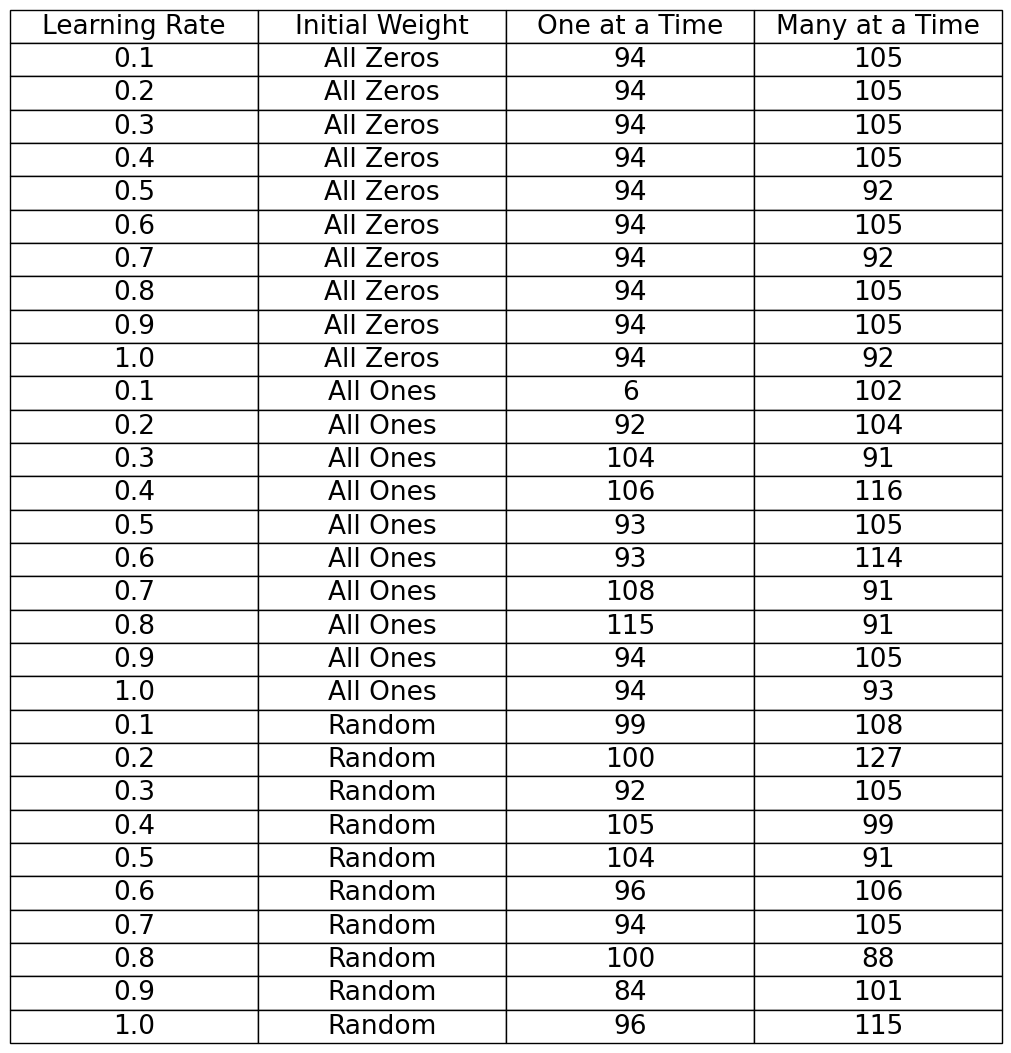


Charts


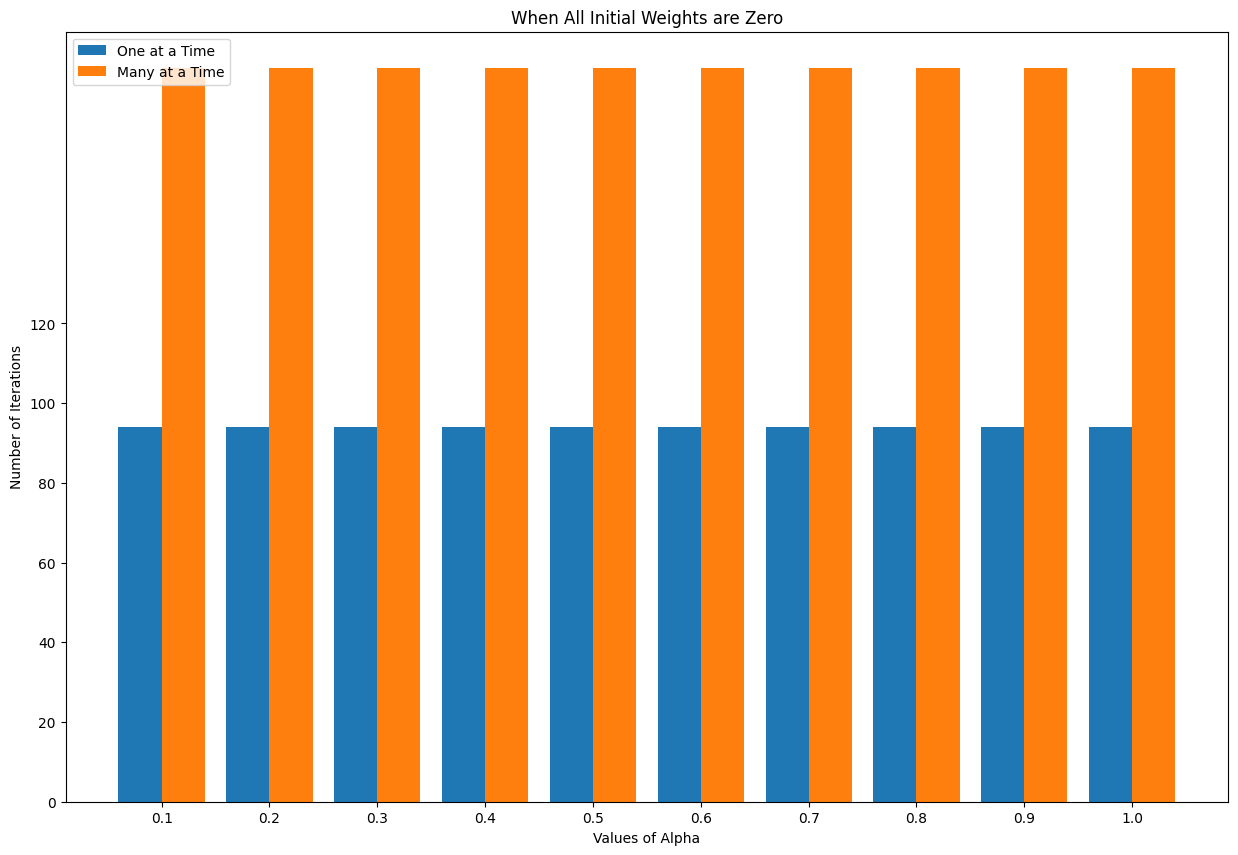

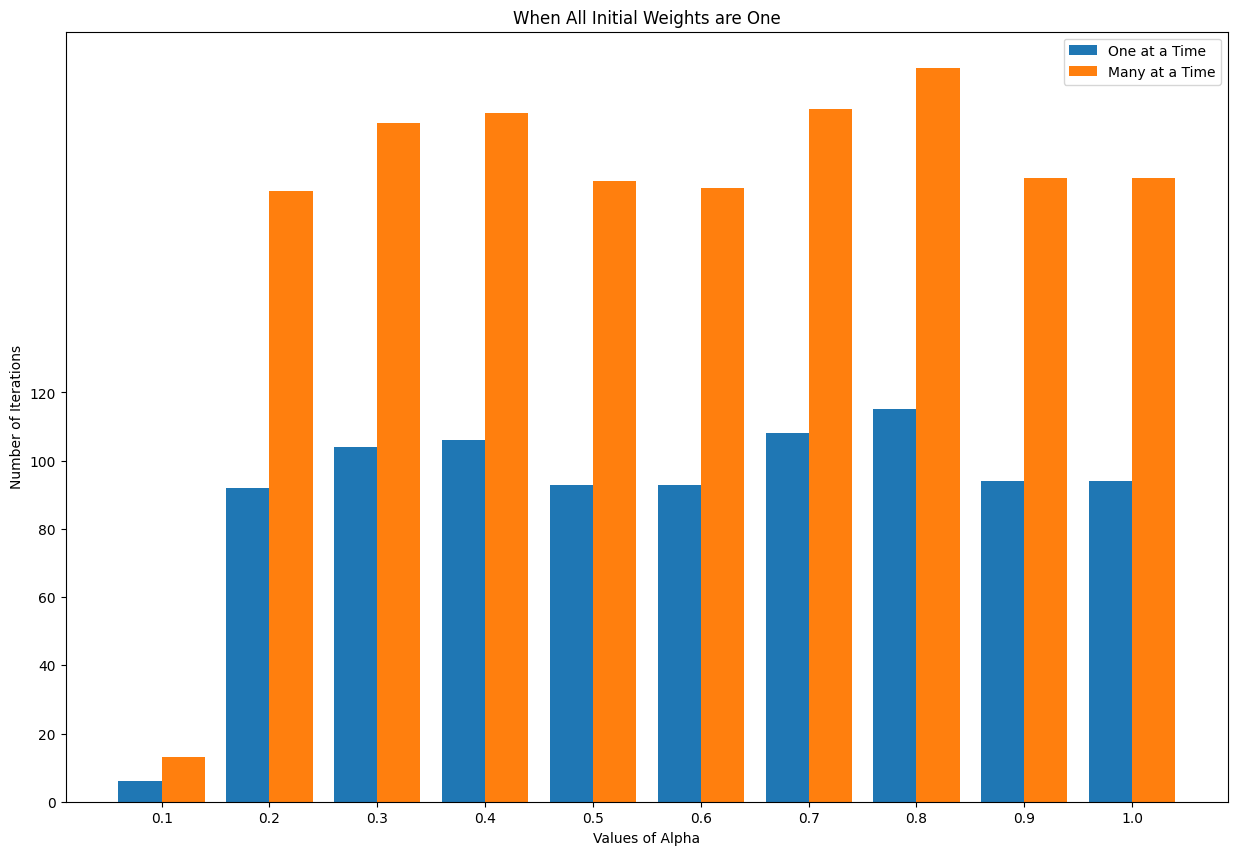

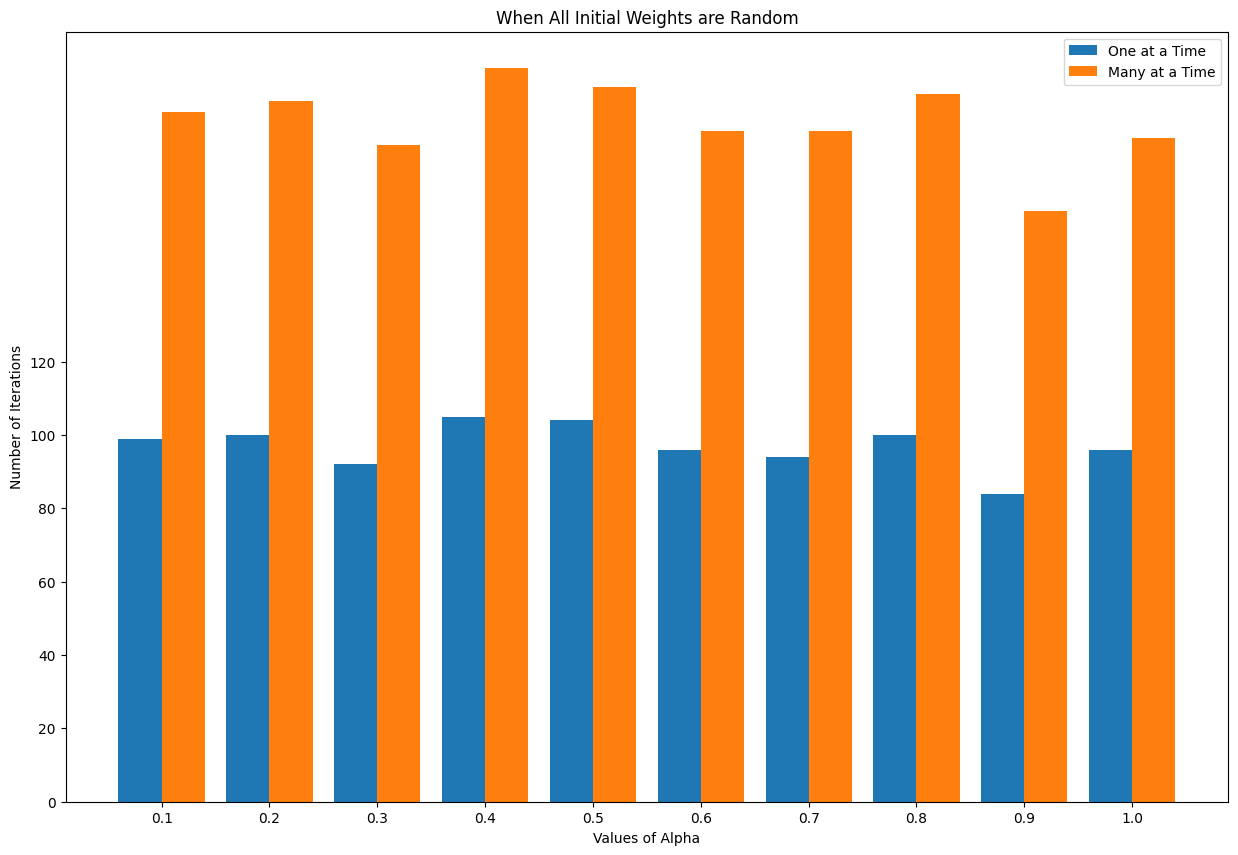

In [ ]:
print('Found Values')
fig, ax = plt.subplots()
table_data = []

for i in range(output.shape[0]):
  table_data.append([output[i, 0], wType[output[i, 1]], int(output[i, 2]), int(output[i, 4])])

colHeader = ['Learning Rate', 'Initial Weight', 'One at a Time', 'Many at a Time']

table = ax.table(cellText = table_data, colLabels = colHeader, cellLoc = 'center', loc = 'center')

table.set_fontsize(25)
table.scale(2,2)
ax.axis('off')
plt.show()

print('\nCharts')
alphaDist = np.arange(len(alphaAll))

plt.figure(figsize = (15, 10))
plt.bar(alphaDist - 0.2, output[0:10, 2], 0.4, label = 'One at a Time')
plt.bar(alphaDist + 0.2, output[0:10, 3], 0.4, label = 'Many at a Time')
plt.xticks(alphaDist, alphaAll)
plt.yticks([i for i in range(0, 121, 20)])
plt.xlabel("Values of Alpha")
plt.ylabel("Number of Iterations")
plt.title("When All Initial Weights are Zero")
plt.legend(loc = 'best')

plt.show()

plt.figure(figsize = (15, 10))
plt.bar(alphaDist - 0.2, output[10:20, 2], 0.4, label = 'One at a Time')
plt.bar(alphaDist + 0.2, output[10:20, 3], 0.4, label = 'Many at a Time')
plt.xticks(alphaDist, alphaAll)
plt.yticks([i for i in range(0, 121, 20)])
plt.xlabel("Values of Alpha")
plt.ylabel("Number of Iterations")
plt.title("When All Initial Weights are One")
plt.legend(loc = 'best')

plt.show()

plt.figure(figsize = (15, 10))
plt.bar(alphaDist - 0.2, output[20:30, 2], 0.4, label = 'One at a Time')
plt.bar(alphaDist + 0.2, output[20:30, 3], 0.4, label = 'Many at a Time')
plt.xticks(alphaDist, alphaAll)
plt.yticks([i for i in range(0, 121, 20)])
plt.xlabel("Values of Alpha")
plt.ylabel("Number of Iterations")
plt.title("When All Initial Weights are Random")
plt.legend(loc = 'best')

plt.show()

## <font color = 'black'>**Question Answer**</font>
---

<font color = 'gray'>***Question (a):***</font> In Task 2, why do we need to take the sample points to a high dimension?
<br>
<font color = 'gray'>***Answer:***</font> From the image seen while trying to plot the training points, it can be seen that the two classes are quite scattered. \\
It looks quite imposible to separate the two classes using a **Linear Line**. \\
So, in order to separate the classes, the sampl points were taken to higher points using $\phi$ function.

<br>

<font color = 'gray'>***Question (b):***</font> In each of the three initial weight cases and for each learning rate, how many updates
does the algorithm take before converging?
<br>
<font color = 'gray'>***Answer:***</font>

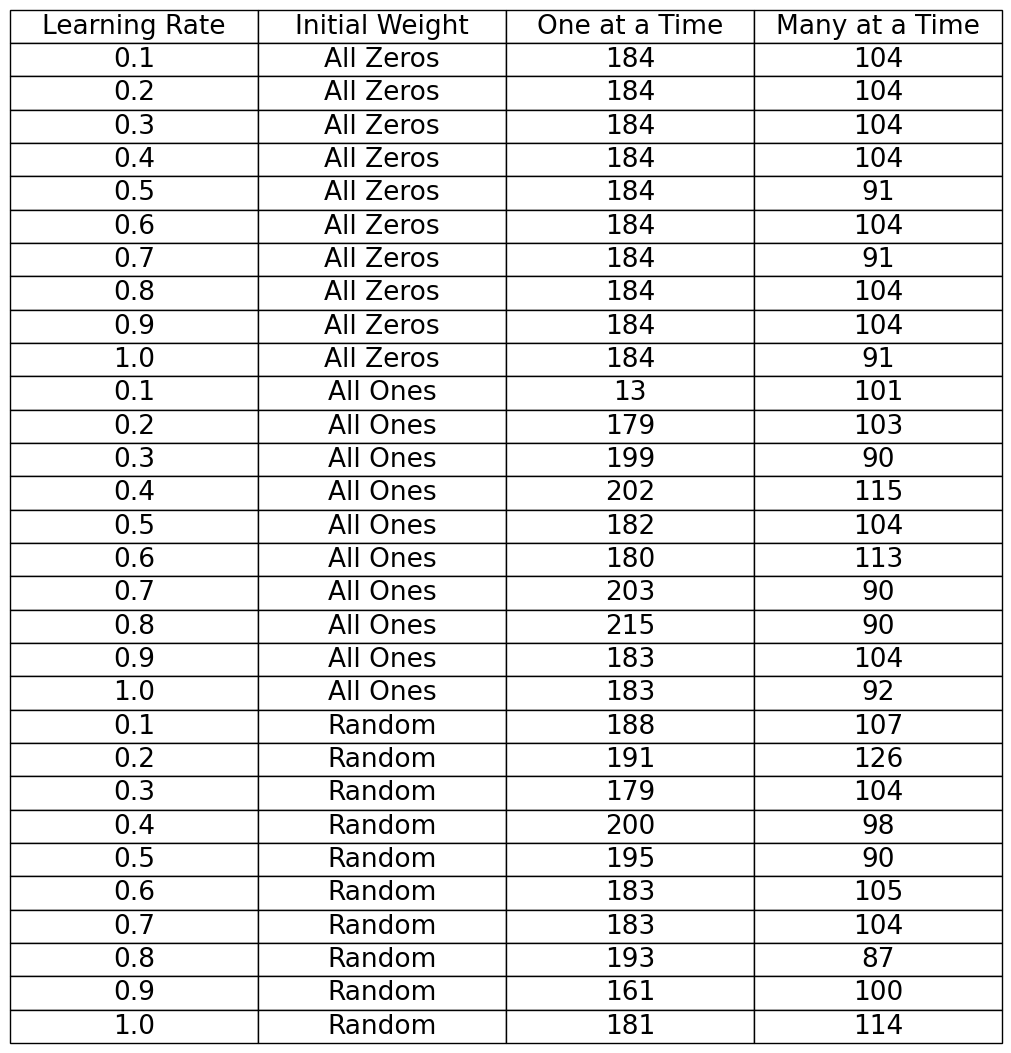

In [ ]:
fig, ax = plt.subplots()
table_data = []

for i in range(output.shape[0]):
  table_data.append([output[i, 0], wType[output[i, 1]], int(output[i, 3]), int(output[i, 5])])

colHeader = ['Learning Rate', 'Initial Weight', 'One at a Time', 'Many at a Time']

table = ax.table(cellText = table_data, colLabels = colHeader, cellLoc = 'center', loc = 'center')

table.set_fontsize(25)
table.scale(2,2)
ax.axis('off')
plt.show()